In [2]:
#imports 
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

# combineren van de verschillende best model properties csv's naar één dataframe
datapath = "/Users/nickneppelenbroek/Jupyter Notebook/Data/JADS/WMO_JADS/data/best_model_properties_csv"
os.chdir(datapath)

In [3]:
# combineren van de verschillende best model properties csv's naar één dataframe
all_filenames = [i for i in glob.glob('*.{}'.format('csv'))]

#combine all files in the list
combined_df = pd.concat([pd.read_csv(f) for f in all_filenames ])
combined_df

,Model,Gridsearch_Params,Train_RMSE,Test_RMSE,Number_of_features,Y_value,Input_filename,Output_filename
0,XGBRegressor,"base_score=0.5, booster='gbtree', colsample_by...",5.723005,5.398953,14,wmoclientenper1000inwoners,df_preprocessed_202104111447_No_Relative_Lasso...,../../data/best_model_202104120948.pickle
0,XGBRegressor,"base_score=0.5, booster='gbtree', colsample_by...",5.473514,5.285730,338,wmoclientenper1000inwoners,df_preprocessed_202104042151_No_Relative.parqu...,../../data/best_model_202104150934.pickle
0,XGBRegressor,"base_score=0.5, booster='gbtree', colsample_by...",6.185691,6.220388,5,wmoclientenper1000inwoners,df_preprocessed_202104151141_Minimum_Mark.parq...,../../data/best_model_202104151142.pickle
0,XGBRegressor,"base_score=0.5, booster='gbtree', colsample_by...",6.030504,5.776896,6,wmoclientenper1000inwoners,df_preprocessed_202104150929_Minimum_Mark.parq...,../../data/best_model_202104150932.pickle
0,XGBRegressor,"base_score=0.5, booster='gbtree', colsample_by...",6.071661,5.514537,9,wmoclientenper1000inwoners,df_preprocessed_202104042151_Minimum_Maikel.pa...,../../data/best_model_202104150933.pickle
0,XGBRegressor,"base_score=0.5, booster='gbtree', colsample_by...",5.300462,5.499499,508,wmoclientenper1000inwoners,df_preprocessed_202104042151_All.parquet.gzip,../../data/best_model_202104150931.pickle
0,XGBRegressor,"base_score=0.5, booster='gbtree', colsample_by...",5.702633,5.102536,29,wmoclientenper1000inwoners,df_preprocessed_202104151343_Boerenverstand_Ma...,../../data/best_model_202104151347.pickle
0,XGBRegressor,"base_score=0.5, booster='gbtree', colsample_by...",5.699372,6.230830,13,wmoclientenper1000inwoners,df_preprocessed_202104121028_No_Relative_FI_Ed...,../../data/best_model_202104121029.pickle
0,XGBRegressor,"base_score=0.5, booster='gbtree', colsample_by...",5.473514,5.285730,338,wmoclientenper1000inwoners,df_preprocessed_202104111447_No_Relative.parqu...,../../data/best_model_202104121014.pickle
0,XGBRegressor,"base_score=0.5, booster='gbtree', colsample_by...",5.444074,5.271410,41,wmoclientenper1000inwoners,Hier komt uiteindelijk de input_filename_locatie,../../data/best_model_202104142142.pickle


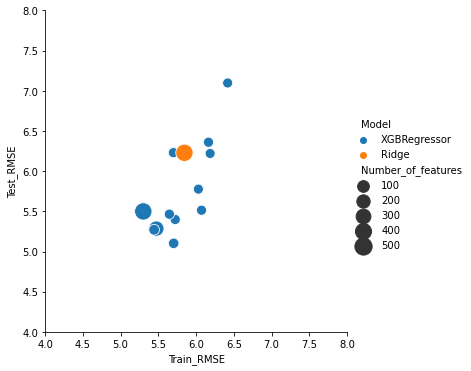

In [4]:
# cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(data=combined_df, x='Train_RMSE', y='Test_RMSE', hue='Model', size='Number_of_features', sizes=(100, 300))
g.set(ylim=(4, 8), xlim=(4, 8))

In [5]:
alt.Chart(combined_df).mark_circle().encode(
    alt.X('Train_RMSE', scale=alt.Scale(zero=False)),
    alt.Y('Test_RMSE', scale=alt.Scale(zero=False, padding=1)),
    color='Model',
    size='Number_of_features',
    tooltip=['Input_filename', 'Number_of_features', 'Train_RMSE', 'Test_RMSE']
    ).interactive()

alt.Chart(...)